In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# import data
dataset = pd.read_csv('/content/sample_data/dummy.csv')
dataset.head(3)

,Attendance_Hours,Final_Marks
0,36.217808,58.997409
1,76.550001,71.598279
2,61.239576,72.520777


In [ ]:
# define target (y) and features (x)

In [ ]:
dataset.columns

Index(['Attendance_Hours', 'Final_Marks'], dtype='object')

In [ ]:
y = dataset['Final_Marks']

In [ ]:
x = dataset['Attendance_Hours']

In [ ]:
# exploratory data analysis
# view the dimensions of dataset
print(dataset.shape)

(199, 2)


In [ ]:
# view the top 5 rows of dataset
print(dataset.head())

   Attendance_Hours  Final_Marks
0         36.217808    58.997409
1         76.550001    71.598279
2         61.239576    72.520777
3         51.906094    69.005976
4         20.921305    53.259605


In [ ]:
# view dataset summary
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Attendance_Hours  199 non-null    float64
 1   Final_Marks       199 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB
None


In [ ]:
# view descriptive statistics
print(dataset.describe())

       Attendance_Hours  Final_Marks
count        199.000000   199.000000
mean          43.776362    62.556870
std           20.641790    10.598223
min           10.386548    38.675109
25%           25.985666    54.477302
50%           44.565692    62.033926
75%           62.064078    71.020784
max           79.082086    85.353395


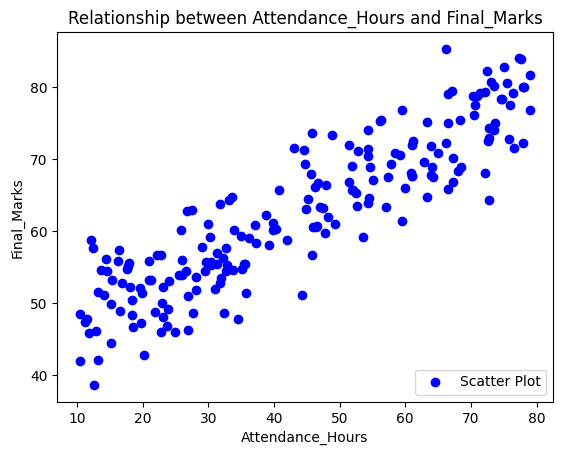

In [ ]:
# plot scatter plot between X and y
plt.scatter(x, y, color = 'blue', label = 'Scatter Plot')
plt.title('Relationship between Attendance_Hours and Final_Marks')
plt.xlabel('Attendance_Hours')
plt.ylabel('Final_Marks')
plt.legend(loc=4)
plt.show()

In [ ]:
# print the dimensions of X and y
print(x.shape)
print(y.shape)

(199,)
(199,)


In [ ]:
# reshape X and y
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

In [ ]:
# print the dimensions of X and y after reshaping
print(x.shape)
print(y.shape)

(199, 1)
(199, 1)


In [ ]:
# split X and y into training and test data sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
# print the dimensions of X_train,X_test,y_train,y_test
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(133, 1)
(133, 1)
(66, 1)
(66, 1)


In [ ]:
# fit the linear model

# instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# train the model using training data sets
lm.fit(x_train, y_train)

# predict on the test data
y_pred = lm.predict(x_test)

In [ ]:
# compute model slope and intercept
a = lm.coef_
b = lm.intercept_,
print("Estimated model shape, a:", a)
print("Estimated model intercept, b:", b)

Estimated model shape, a: [[0.45477469]]
Estimated model intercept, b: (array([42.43709453]),)


In [ ]:
# predicting Final_Marks values
lm.predict(x)[0:5]

# predicting Final_Marks values on first five Attendance_Hours values.

array([[58.90803692],
       [77.25009737],
       [70.28730342],
       [66.04267206],
       [51.95157436]])

In [ ]:
# to make an individual prediction using the linear regression model.
print(str(lm.predict([[133]])))

[[102.9221277]]


In [ ]:
# calculate and print Root Mean Square Error(RMSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 4.5872


In [ ]:
# calculate and print r2_score
from sklearn.metrics import r2_score
print ("R2 score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 score value: 0.8245


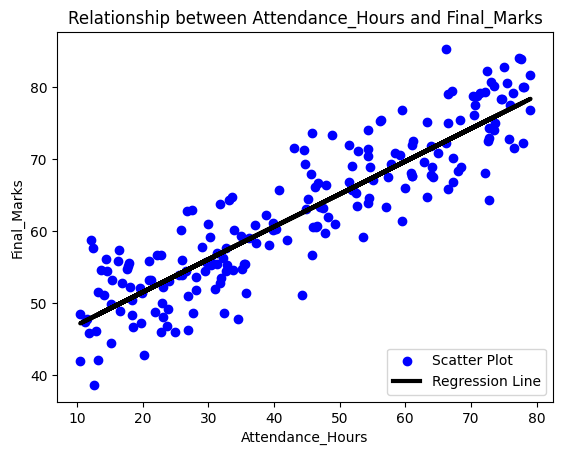

In [ ]:
# plot the Regression Line
plt.scatter(x, y, color = 'blue', label = 'Scatter Plot')
plt.plot(x_test, y_pred, color = 'black', linewidth = 3, label = 'Regression Line')
plt.title('Relationship between Attendance_Hours and Final_Marks')
plt.xlabel('Attendance_Hours')
plt.ylabel('Final_Marks')
plt.legend(loc=4)
plt.show()

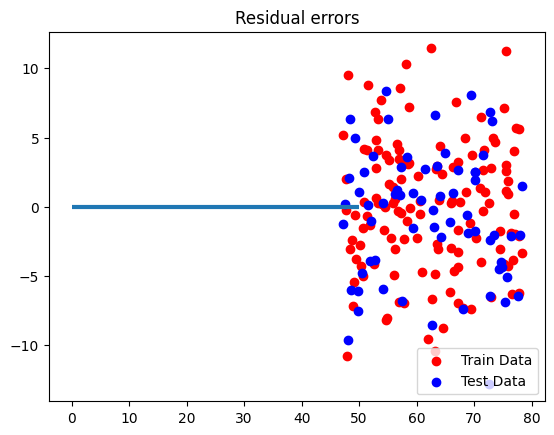

In [ ]:
# plotting residual errors
plt.scatter(lm.predict(x_train), lm.predict(x_train) - y_train, color = 'red', label = 'Train Data')
plt.scatter(lm.predict(x_test), lm.predict(x_test) - y_test, color = 'blue', label = 'Test Data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc=4)
plt.show()

In [ ]:
# checking for Overfitting or Underfitting the data
print("Trining set score: {:.4f}".format(lm.score(x_train, y_train)))
print("Test set score: {:.4f}".format(lm.score(x_test, y_test)))

Trining set score: 0.7961
Test set score: 0.8245
